# Importing the libraries

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn; seaborn.set()
import datetime
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics
import statsmodels.api as sm

# Reading the data from the dataset

In [5]:
bitcoin_database=pd.read_csv('bitcoin_2017_to_2023.csv')

# Data Exploration

In [6]:
# Convert 'timestamp' column to datetime format
bitcoin_database['timestamp'] = pd.to_datetime(bitcoin_database['timestamp'])

# Convert 'timestamp' column to date
bitcoin_database['date'] = bitcoin_database['timestamp'].dt.date

# Display the DataFrame with the new 'date' column
print(bitcoin_database.head())

            timestamp      open      high       low     close    volume  \
0 2023-08-01 13:19:00  28902.48  28902.49  28902.48  28902.49   4.68658   
1 2023-08-01 13:18:00  28902.48  28902.49  28902.48  28902.49   4.77589   
2 2023-08-01 13:17:00  28908.52  28908.53  28902.48  28902.49  11.52263   
3 2023-08-01 13:16:00  28907.41  28912.74  28907.41  28908.53  15.89610   
4 2023-08-01 13:15:00  28896.00  28907.42  28893.03  28907.41  37.74657   

   quote_asset_volume  number_of_trades  taker_buy_base_asset_volume  \
0        1.354538e+05               258                      0.89391   
1        1.380351e+05               317                      2.24546   
2        3.330532e+05               451                      2.70873   
3        4.595556e+05               483                     10.22981   
4        1.090761e+06               686                     16.50452   

   taker_buy_quote_asset_volume        date  
0                  25836.224836  2023-08-01  
1                  64899

In [22]:
bitcoin_database.head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,date
0,2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.68658,1.354538e+05,258,0.89391,25836.224836,2023-08-01
1,2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49,4.77589,1.380351e+05,317,2.24546,64899.385195,2023-08-01
2,2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49,11.52263,3.330532e+05,451,2.70873,78290.170121,2023-08-01
3,2023-08-01 13:16:00,28907.41,28912.74,28907.41,28908.53,15.89610,4.595556e+05,483,10.22981,295738.166916,2023-08-01
4,2023-08-01 13:15:00,28896.00,28907.42,28893.03,28907.41,37.74657,1.090761e+06,686,16.50452,476955.246611,2023-08-01


In [23]:
bitcoin_database.tail()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,date
3125995,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,599.999338,1,0.140796,599.999338,2017-08-17
3125996,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,51.171852,3,0.012008,51.171852,2017-08-17
3125997,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,1117.542921,2,0.261074,1117.542921,2017-08-17
3125998,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,0.000000,0,0.000000,0.000000,2017-08-17
3125999,2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,7564.906851,3,0.075183,320.390851,2017-08-17


## Identifying the key statistics of bitcoin database

In [24]:
bitcoin_database.describe()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
count,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06
mean,2.008947e+04,2.010217e+04,2.007666e+04,2.008946e+04,5.290800e+01,1.155882e+06,1.018583e+03,2.632231e+01,5.727211e+05
std,1.605896e+04,1.606926e+04,1.604871e+04,1.605896e+04,9.774388e+01,2.335868e+06,1.817813e+03,4.972880e+01,1.193135e+06
min,2.830000e+03,2.830000e+03,2.817000e+03,2.817000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.624747e+03,7.629600e+03,7.620000e+03,7.624798e+03,1.120167e+01,1.122335e+05,1.500000e+02,5.100715e+00,5.125057e+04
50%,1.169999e+04,1.170681e+04,1.169249e+04,1.170000e+04,2.387539e+01,3.706467e+05,4.130000e+02,1.148990e+01,1.753695e+05
75%,2.989957e+04,2.990724e+04,2.989051e+04,2.989957e+04,5.393630e+01,1.276762e+06,1.026000e+03,2.693009e+01,6.210250e+05
max,6.900000e+04,6.900000e+04,6.878670e+04,6.900000e+04,5.877775e+03,1.459557e+08,1.073150e+05,3.537453e+03,8.947551e+07


## Checking the amount of NaN values in our dataset

In [25]:
bitcoin_database.isna().sum()/bitcoin_database.count()

timestamp                       0.0
open                            0.0
high                            0.0
low                             0.0
close                           0.0
volume                          0.0
quote_asset_volume              0.0
number_of_trades                0.0
taker_buy_base_asset_volume     0.0
taker_buy_quote_asset_volume    0.0
date                            0.0
dtype: float64

## Cleaning the dataset removing NaNs if any

In [26]:
# Size of the dataset before removing missing values
original_size = bitcoin_database.shape

# Remove rows with any missing values
cleaned_data = bitcoin_database.dropna()

# Size of the dataset after removing missing values
cleaned_size = cleaned_data.shape

original_size, cleaned_size

((3126000, 11), (3126000, 11))

In [27]:
print(bitcoin_database.columns)

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume',
       'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume',
       'taker_buy_quote_asset_volume', 'date'],
      dtype='object')


In [28]:
bitcoin_database.count()

timestamp                       3126000
open                            3126000
high                            3126000
low                             3126000
close                           3126000
volume                          3126000
quote_asset_volume              3126000
number_of_trades                3126000
taker_buy_base_asset_volume     3126000
taker_buy_quote_asset_volume    3126000
date                            3126000
dtype: int64

## Checking the historical record of bitcoin prices for the entire dataset

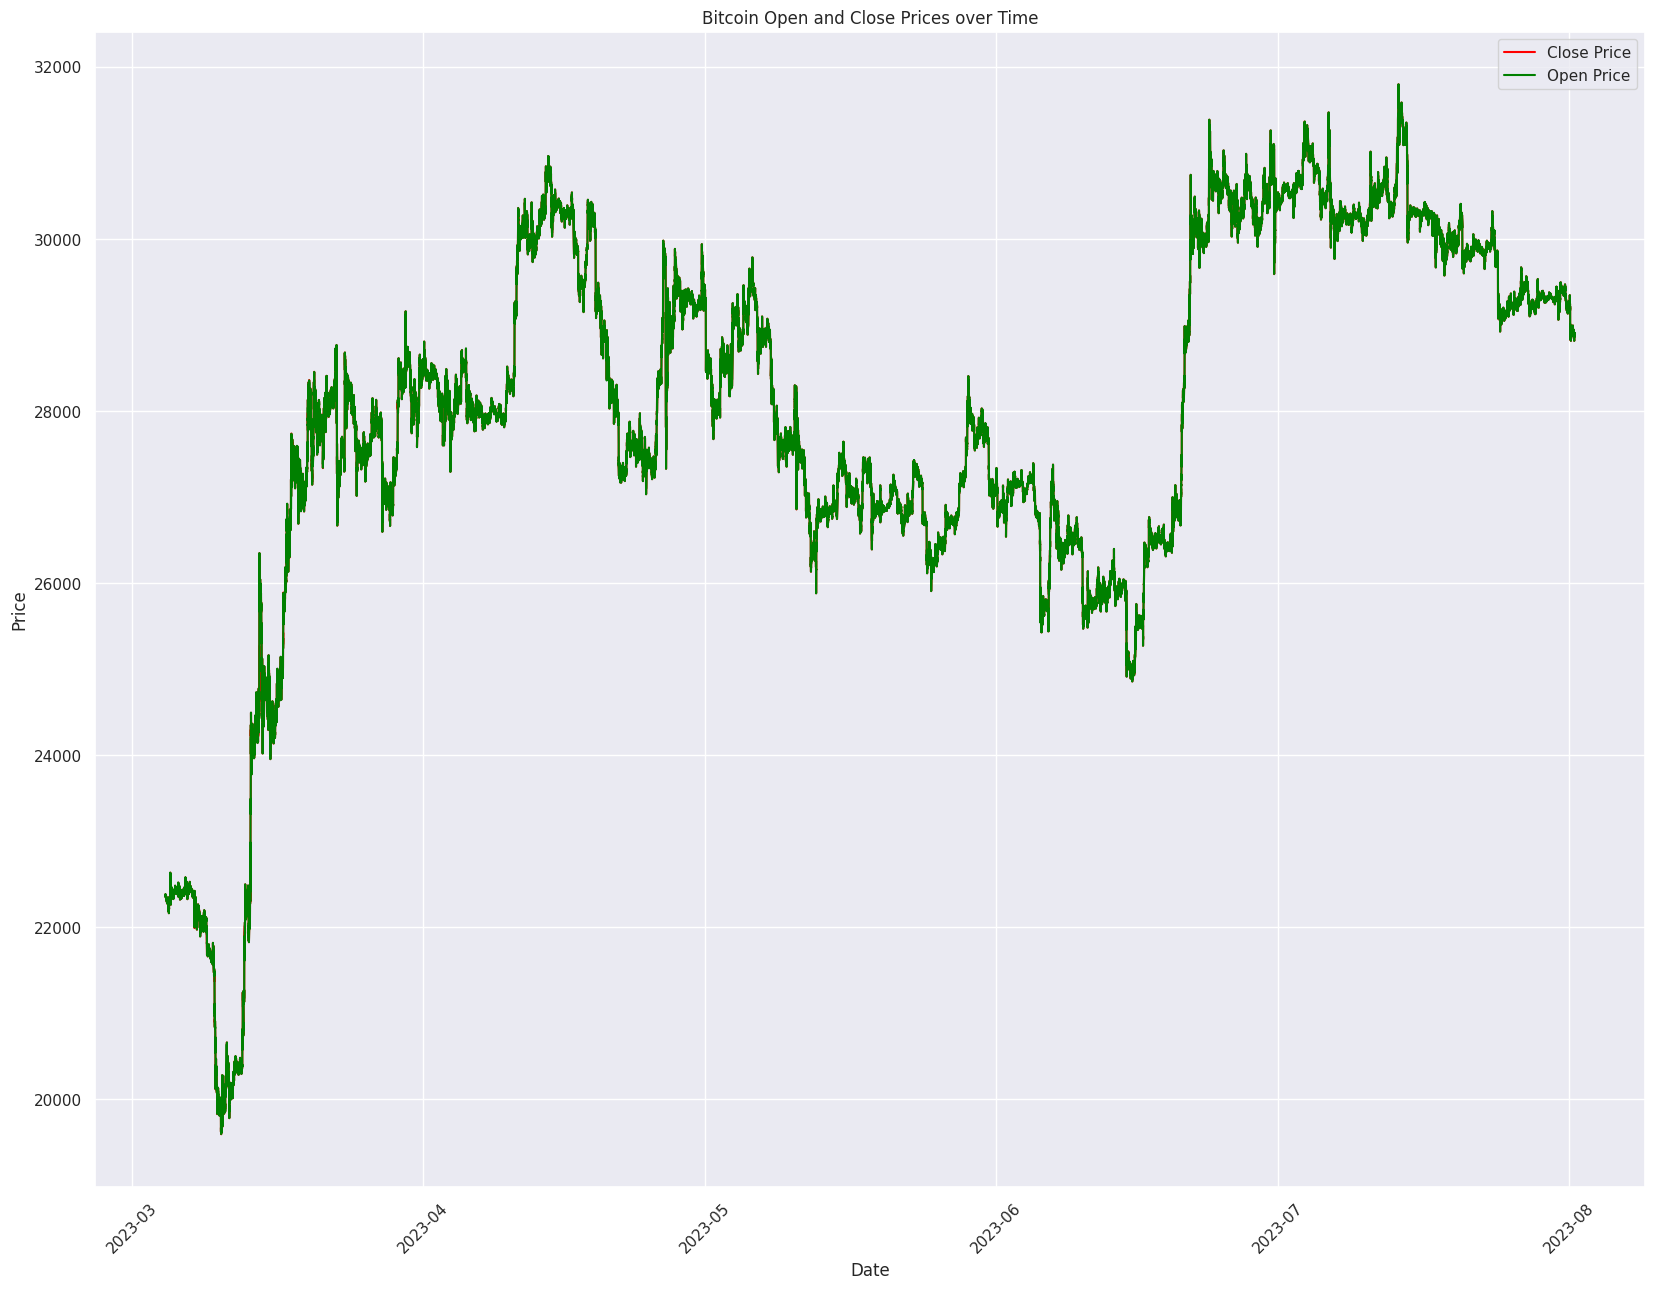

In [7]:
# Plotting
plt.figure(figsize=(20, 15))
plt.plot(bitcoin_database['timestamp'], bitcoin_database['close'], label='Close Price', color='red')
plt.plot(bitcoin_database['timestamp'], bitcoin_database['open'], label='Open Price', color='green')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Open and Close Prices over Time')
plt.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display plot
plt.show()

## Also checking the low and highs for entire dataset

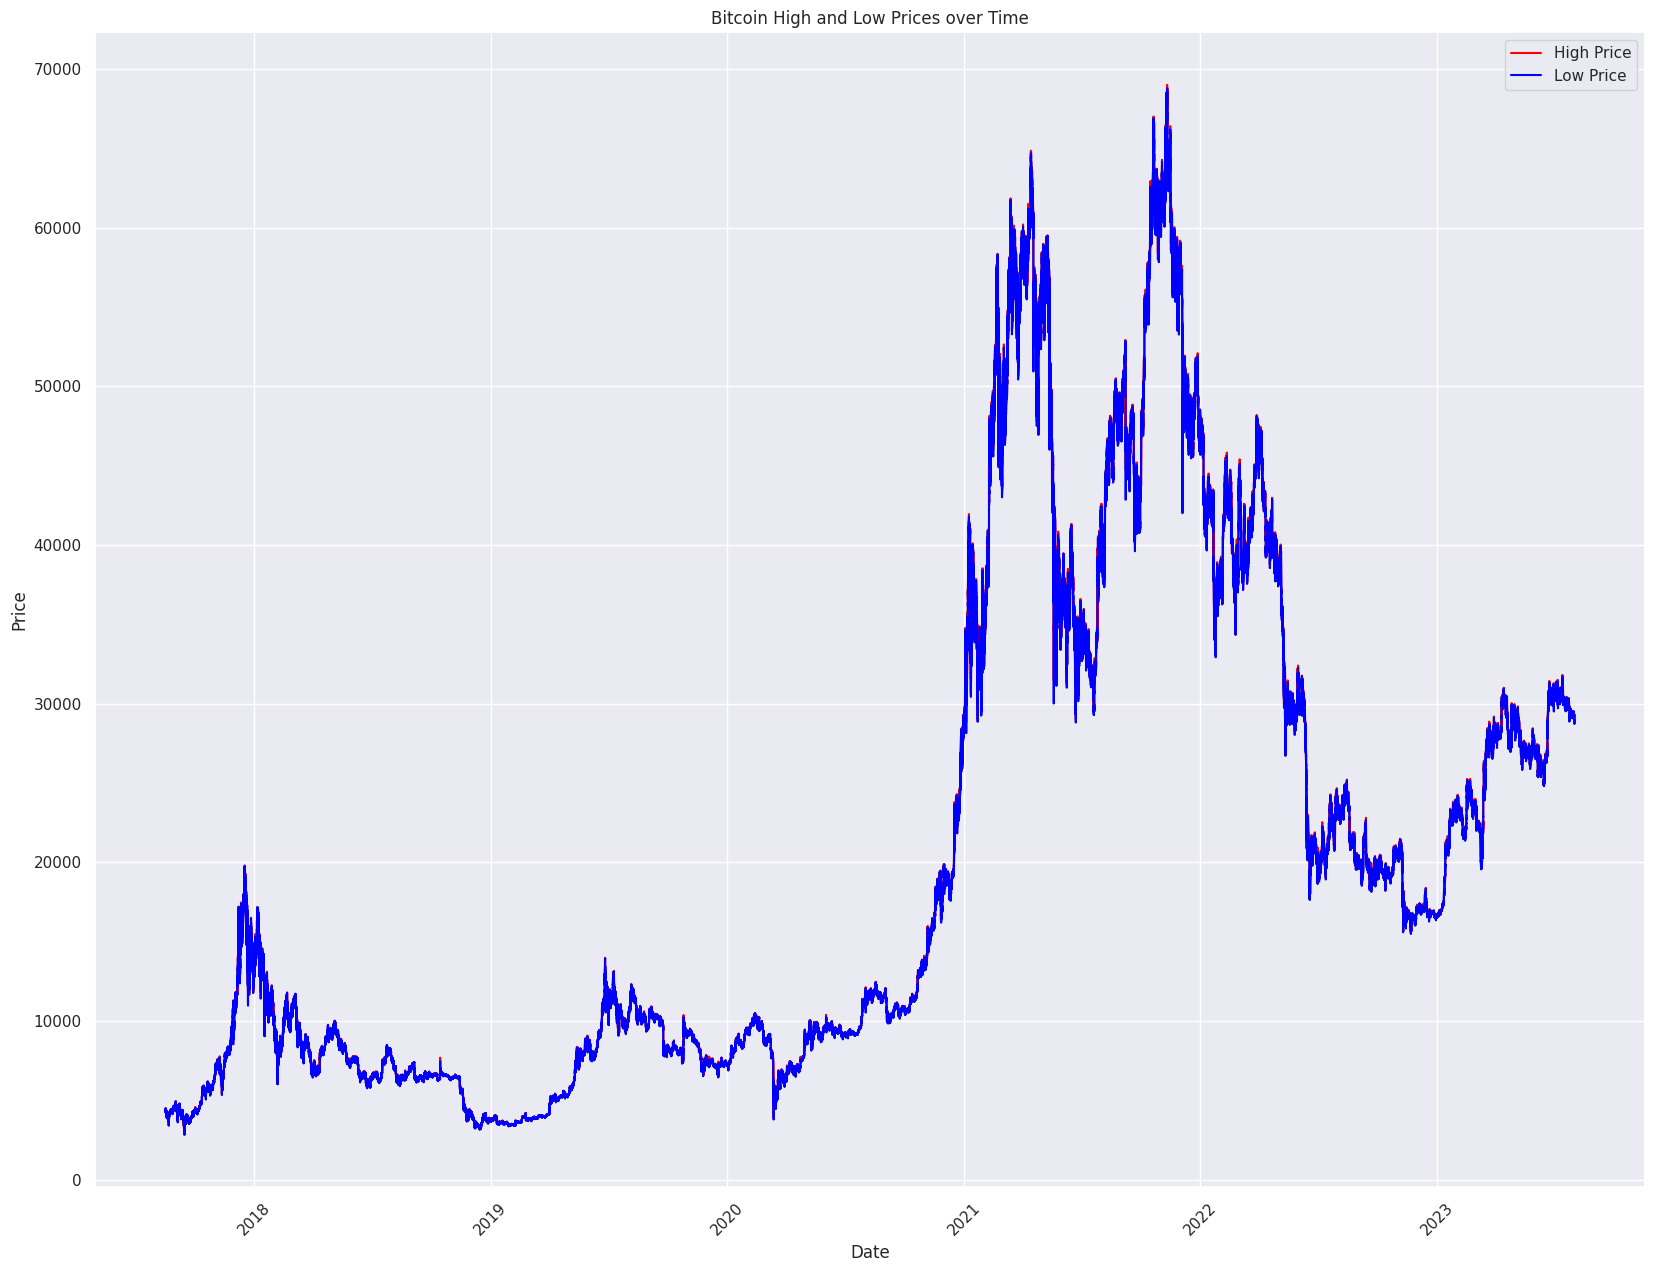

In [38]:
# Plotting
plt.figure(figsize=(20, 15))
plt.plot(bitcoin_database['timestamp'], bitcoin_database['high'], label='High Price', color='red')
plt.plot(bitcoin_database['timestamp'], bitcoin_database['low'], label='Low Price', color='blue')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin High and Low Prices over Time')
plt.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display plot
plt.show()

## 😖

### Since this above graph shows that there is **no clear trend(smaller upward trend)** and **no defined seasonality**. We need to perform more analysis. Also it is not making much sense, lets do this anlaysis for last year which is 2023

(array([19417., 19448., 19478., 19509., 19539., 19570.]),
 [Text(19417.0, 0, '2023-03'),
  Text(19448.0, 0, '2023-04'),
  Text(19478.0, 0, '2023-05'),
  Text(19509.0, 0, '2023-06'),
  Text(19539.0, 0, '2023-07'),
  Text(19570.0, 0, '2023-08')])

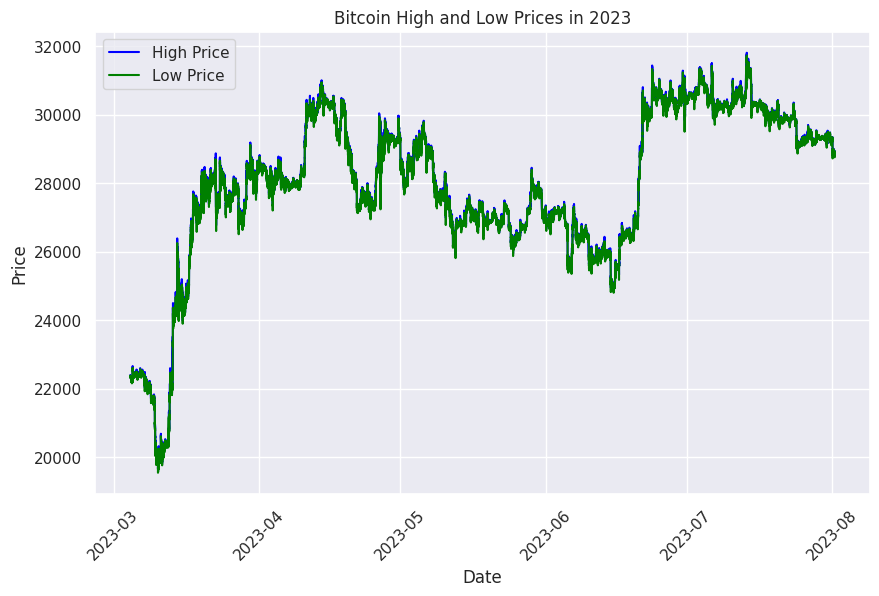

In [8]:
# Filter data for the year 2023
bitcoin_data_2023 = bitcoin_database[bitcoin_database['timestamp'].dt.year == 2023]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(bitcoin_data_2023['timestamp'], bitcoin_data_2023['high'], label='High Price', color='blue')
plt.plot(bitcoin_data_2023['timestamp'], bitcoin_data_2023['low'], label='Low Price', color='green')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin High and Low Prices in 2023')
plt.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

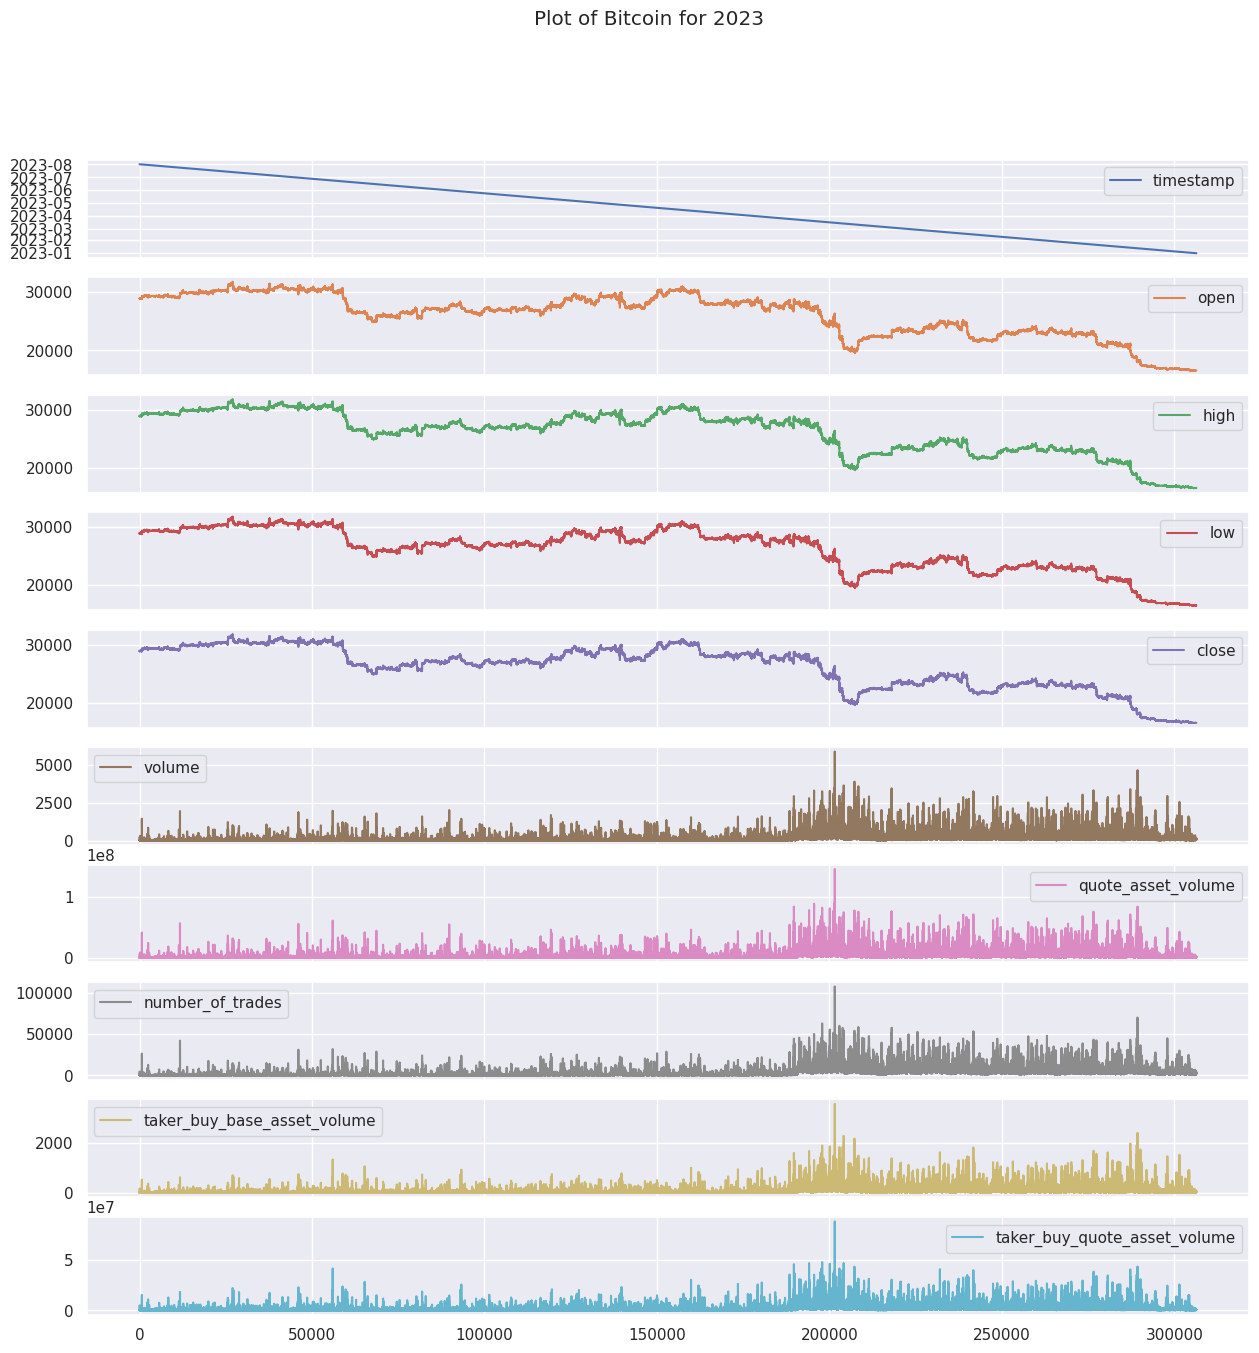

In [32]:
bitcoin_data_2023.plot(figsize=(15,15),title='Plot of Bitcoin for 2023',subplots=True)

## Checking the STL Decomposition of the 2023 data

In [18]:
#!pip install stldecompose
!pip install statsmodels==0.12.2

  Using cached statsmodels-0.12.2.tar.gz (17.5 MB)
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [17]:
from stldecompose import decompose
# Convert the 'date' column to datetime if it's not already
bitcoin_database['date'] = pd.to_datetime(bitcoin_database['date'])

# Set the 'date' column as the index to convert the DataFrame to a time series
bitcoin_time_series = bitcoin_database.set_index('date')

# Perform STL decomposition
stl_result = decompose(bitcoin_time_series['open'], period=365)  # Adjust period as needed

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(18, 12))
ax1.plot(stl_result.trend)
ax1.set_ylabel('Trend')
ax2.plot(stl_result.seasonal)
ax2.set_ylabel('Seasonal')
ax3.plot(stl_result.resid)
ax3.set_ylabel('Residual')
ax4.plot(stl_result.observed)
ax4.set_ylabel('Observed')
plt.tight_layout()
plt.show()

ImportError: cannot import name '_maybe_get_pandas_wrapper_freq' from 'statsmodels.tsa.filters._utils' (/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/filters/_utils.py)

## Checking if the data is stationary using the Augmented Dickey-Fuller (ADF) test

### Since the entire dataset is 3.12 million records we will extract a part of data say a quarter of 2023 and check if the data is stationary.

In [8]:
# Extract data for the first quarter of 2023
first_quarter_2023 = bitcoin_database[(bitcoin_database['timestamp'] >= '2023-01-01') &
                                       (bitcoin_database['timestamp'] < '2023-04-01')]


In [9]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test on 'close' prices
result = adfuller(first_quarter_2023['close'])

# Print test statistic and p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Compare p-value with significance level (e.g., 0.05)
if result[1] <= 0.05:
    print("Reject the null hypothesis - Data is stationary")
else:
    print("Fail to reject the null hypothesis - Data is not stationary")

ADF Statistic: -0.8465346164286811
p-value: 0.8050694168517409
Fail to reject the null hypothesis - Data is not stationary


### Since the data is non stationary, we need to make it stationary using differencing

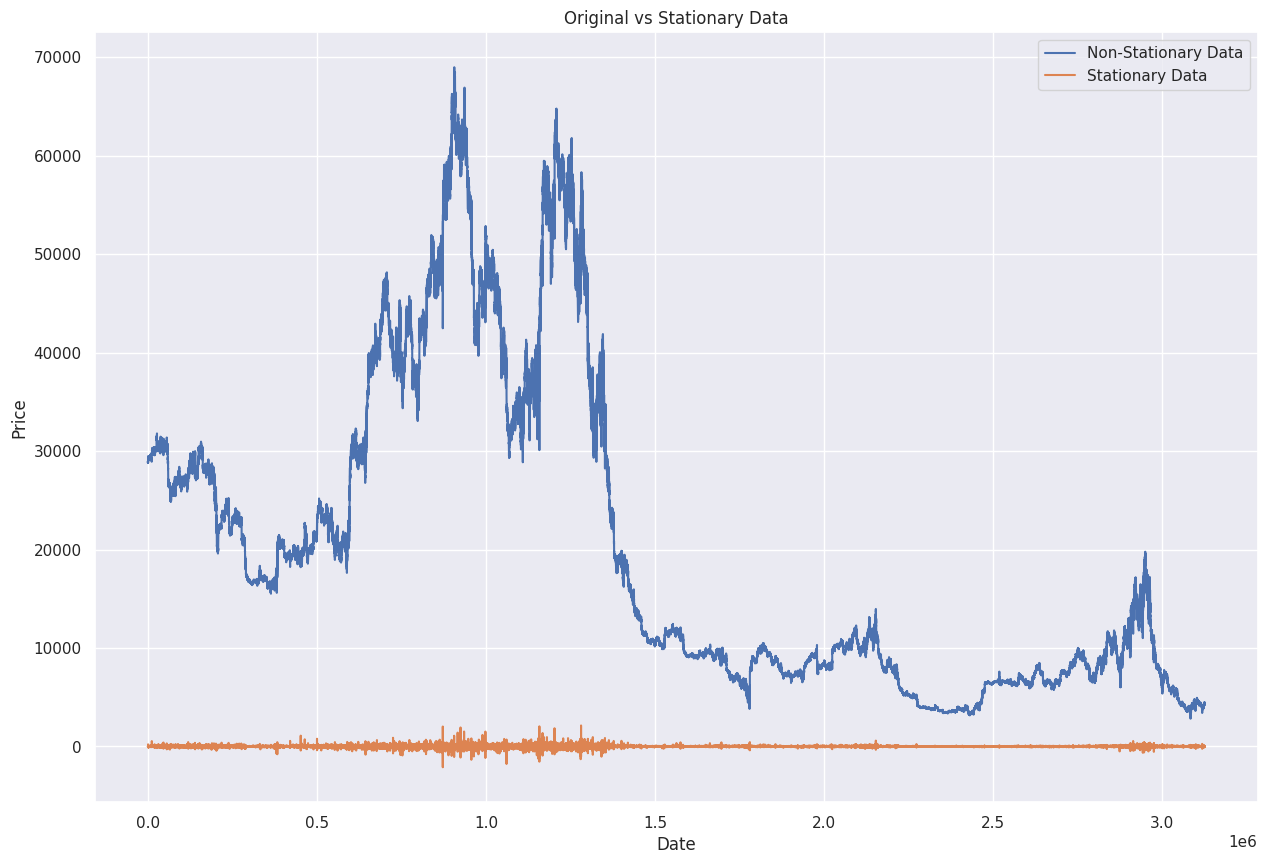

In [11]:
# Original non-stationary data
non_stationary_data = bitcoin_database['close']

# Differencing to make the data stationary
stationary_data = non_stationary_data.diff().dropna()

# Plot the original and differenced data
plt.figure(figsize=(15, 10))
plt.plot(non_stationary_data, label='Non-Stationary Data')
plt.plot(stationary_data, label='Stationary Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Original vs Stationary Data')
plt.legend()
plt.show()